In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#problem 1 start
df = pd.read_csv("/content/drive/MyDrive/CTA/Datasets/diabetes.csv")

In [ ]:
df.head()
#getting the first 5 rows of dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()
#shwoing the information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()
#showing detailed columns and row data of dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()
#showing a whole list of null valued datas

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#handling missing values
# Checking for zero or anomalous values in specific columns
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_check:
    print(f"\n{col} - Zero value count: {sum(df[col] == 0)}")
#Replacing zero values with the column median
for col in columns_to_check:
    df[col] = df[col].replace(0, df[col].median())

df.describe()



Glucose - Zero value count: 0

BloodPressure - Zero value count: 0

SkinThickness - Zero value count: 0

Insulin - Zero value count: 0

BMI - Zero value count: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#featuring engineering

x =df.drop(columns=['Outcome']).values
y = df['Outcome'].values
#spl;ittting into traim 70% ro 30%
np.random.seed(42)
indices = np.arange(len(x))
np.random.shuffle(indices)
#defining the splits
splitIndex = int(len(x)*0.7)
xTrain, xTest = x[indices[:splitIndex]], x[indices[splitIndex:]]
yTrain, yTest = y[indices[:splitIndex]], y[indices[splitIndex:]]
print(len(x))
print(len(y))
print(xTrain[:5])
print(yTrain[:5])

768
768
[[6.00e+00 9.80e+01 5.80e+01 3.30e+01 1.90e+02 3.40e+01 4.30e-01 4.30e+01]
 [2.00e+00 1.12e+02 7.50e+01 3.20e+01 0.00e+00 3.57e+01 1.48e-01 2.10e+01]
 [2.00e+00 1.08e+02 6.40e+01 0.00e+00 0.00e+00 3.08e+01 1.58e-01 2.10e+01]
 [8.00e+00 1.07e+02 8.00e+01 0.00e+00 0.00e+00 2.46e+01 8.56e-01 3.40e+01]
 [7.00e+00 1.36e+02 9.00e+01 0.00e+00 0.00e+00 2.99e+01 2.10e-01 5.00e+01]]
[0 0 0 0 0]


In [ ]:
# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [ ]:
# Function to predict the class for a single query point
def predict_single(xTrain, yTrain, query, k=5):
    distances = []

    # Calculate distance from the query to all training points
    for i in range(len(xTrain)):
        distance = euclidean_distance(xTrain[i], query)
        distances.append((distance, yTrain[i]))  # Append (distance, label)

    # Sort the distances
    distances.sort(key=lambda x: x[0])  # Sort by distance

    # Get the labels of the k nearest neighbors
    k_nearest_labels = [label for _, label in distances[:k]]

    # Majority vote: find the most common class
    prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
    return prediction


In [ ]:
# Function to predict for all test samples
def predict(xTrain, yTrain, X_test, k=5):
    predictions = []
    for query in X_test:
        pred = predict_single(xTrain, yTrain, query, k)
        predictions.append(pred)
    return predictions


In [ ]:

# Function to calculate accuracy
def accuracy_score(yTrue, yPred):
    correct = np.sum(yTrue == yPred)  # Count matching values
    return correct / len(yTrue)
k = 5
yPred = predict(xTrain, yTrain, xTest, k)
accuracy = accuracy_score(yTest, yPred)
print(f"Accuracy of KNN model with k={k}: {accuracy * 100:.2f}%")
print("\nFirst 10 predictions vs actual labels:")
print("Predicted:",yPred[:10])
print("Actual:", yTest[:10])


Accuracy of KNN model with k=5: 73.59%

First 10 predictions vs actual labels:
Predicted: [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
Actual: [0 1 0 0 0 0 1 0 0 0]


In [ ]:
#for minimun to maxu=imum scaling
def min_max_scale(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

xTrainScaled = min_max_scale(xTrain)
xTestScaled = min_max_scale(xTest)
print(xTrainScaled[:5])


[[0.4        0.29787234 0.33333333 0.2826087  0.24109589 0.32310838
  0.15029889 0.43137255]
 [0.13333333 0.39716312 0.53571429 0.27173913 0.02260274 0.35787321
  0.02988898 0.        ]
 [0.13333333 0.36879433 0.4047619  0.17391304 0.02260274 0.25766871
  0.03415884 0.        ]
 [0.53333333 0.36170213 0.5952381  0.17391304 0.02260274 0.13087935
  0.33219471 0.25490196]
 [0.46666667 0.56737589 0.71428571 0.17391304 0.02260274 0.2392638
  0.05636208 0.56862745]]


In [ ]:
##to training aand testing knn scaled data
kNeighbors = 5
yPredScaled = predict(xTrainScaled, yTrain, xTestScaled, kNeighbors)
accuracyScaled = accuracy_score(yTest, yPredScaled)

print(f"Accuracy with scaled data (k={kNeighbors}): {accuracyScaled * 100:.2f}%")
#comparing
print(f"Accuracy with original data: {accuracy * 100:.2f}%")
print(f"Accuracy with scaled data: {accuracyScaled * 100:.2f}%")


Accuracy with scaled data (k=5): 73.16%
Accuracy with original data: 73.59%
Accuracy with scaled data: 73.16%


In [ ]:
#PRIBELM 3
#predicting a single query wuith costt
def predict_single_with_cost(xTrain, yTrain, query, k):
    distances = []
    cost = 0  # Track computation cost (distance calculations)

    for i in range(len(xTrain)):
        distance = euclidean_distance(xTrain[i], query)
        distances.append((distance, yTrain[i]))
        cost += 1

    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)

    return prediction, cost


In [ ]:
#prediciting a wholee query with cost
def predict_with_cost(xTrain, yTrain, xTest, k):
    predictions = []
    total_cost = 0

    for query in xTest:
        pred, cost = predict_single_with_cost(xTrain, yTrain, query, k)
        predictions.append(pred)
        total_cost += cost

    return np.array(predictions), total_cost


In [ ]:
#experimenting with k = 1 to 15 values
k_values = range(1, 16)
accuracy_original = []
accuracy_scaled = []
cost_original = []
cost_scaled = []

for k in k_values:
    #original dataset
    yPredOriginal, costOrig = predict_with_cost(xTrain, yTrain, xTest, k)
    accuracy_original.append(accuracy_score(yTest, yPredOriginal))
    cost_original.append(costOrig)

    #scaled dataset
    yPredScaled, costScale = predict_with_cost(xTrainScaled, yTrain, xTestScaled, k)
    accuracy_scaled.append(accuracy_score(yTest, yPredScaled))
    cost_scaled.append(costScale)

print("Accuracies with original data:", accuracy_original)
print("Accuracies with scaled data:", accuracy_scaled)
print("Computation cost with original data:", cost_original)
print("Computation cost with scaled data:", cost_scaled)


Accuracies with original data: [0.6796536796536796, 0.7229437229437229, 0.7316017316017316, 0.7662337662337663, 0.7359307359307359, 0.7575757575757576, 0.7445887445887446, 0.7619047619047619, 0.7445887445887446, 0.7445887445887446, 0.7359307359307359, 0.7272727272727273, 0.7359307359307359, 0.7445887445887446, 0.7489177489177489]
Accuracies with scaled data: [0.6753246753246753, 0.696969696969697, 0.696969696969697, 0.7316017316017316, 0.7316017316017316, 0.7402597402597403, 0.7186147186147186, 0.7186147186147186, 0.7229437229437229, 0.7272727272727273, 0.7316017316017316, 0.7272727272727273, 0.7186147186147186, 0.7186147186147186, 0.7272727272727273]
Computation cost with original data: [124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047]
Computation cost with scaled data: [124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047, 124047]


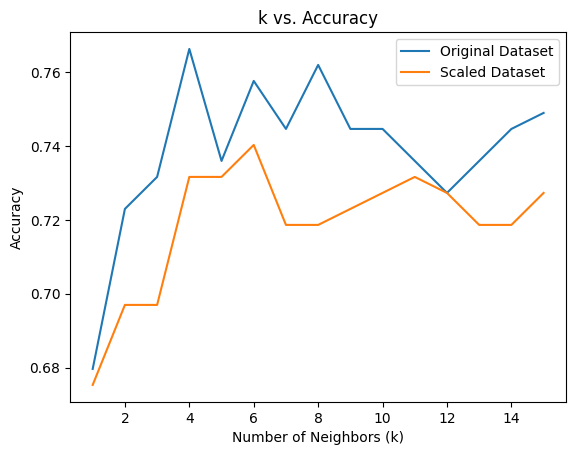

In [ ]:
#plotting the values results in graph
#k vs accuray
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, accuracy_original, label='Original Dataset')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.legend()
plt.show()


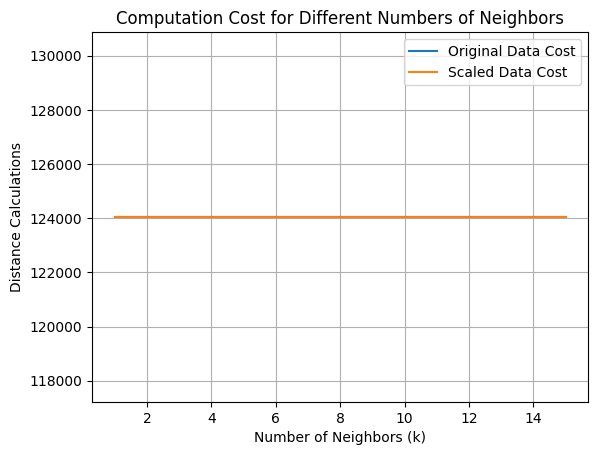

In [ ]:
#plot k vs computational cost gprah

plt.figure()
plt.plot(k_values, cost_original, label='Original Data Cost')
plt.plot(k_values, cost_scaled, label='Scaled Data Cost')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Distance Calculations')
plt.title('Computation Cost for Different Numbers of Neighbors')
plt.legend()
plt.grid()
plt.show()


### PROBLEM2 discussion

### If the accuracy improves significantly after scaling, it means the original dataset had features with very different ranges, and those differences were messing up the distance calculations. Features with larger values were unfairly dominating the results, making KNN less accurate.

KNN works by measuring distances between points to decide which neighbors are closest. If some features have bigger ranges (like income vs. age), those features will overpower the others in the distance calculations. This can lead to poor neighbor selection and lower accuracy.

### Scaling fixes this by making all features equally important, ensuring KNN focuses on the actual relationships in the data rather than being biased by size differences.

### PROBLEM 4

The challanges using Knn
slow for large datasets- as it needs to calculate datapoint for each and every datapoint

high memoryusage - stores a whole dataset even if we dot want to




improving knn
using smaller subsets

using both cpu and gpu to process

reducing the dimensions for easy calculation
